In [1]:
"""
This notebook is meant as an introduction to using python in general with specific applications
to the LLC_Membranes repository. Work your way through each block of code to get practice using
modules that are commonly used in python scripts in this repository. Press shift+enter in
order to run the code in each block.

In addition to being able to write code that works as intended, it is important to write your
code in a neat and readable way that is consistent with how others write their code. This way,
people will be able to look at your code and understand what is going on. The best way to do 
this is by following the PEP 8 style guide (https://www.python.org/dev/peps/pep-0008/). The 
integrated development environment (IDE), Pycharm, automatically checks for coherence to the 
PEP 8 guidelines. Simply using Pycharm and following its style suggestions is a great way to
learn how to consistently write nice code.

TIP: generally, any question you might have about doing something in python, or about any 
error you encounter will likely have already been asked online somewhere. Try googling your 
exact problem, and you'll probably find the same question answered by someone else.
"""

"\nThis notebook is meant as an introduction to using python in general with specific applications\nto the LLC_Membranes repository. Work your way through each block of code to get practice using\nmodules that are commonly used in python scripts in this repository. Press shift+enter in\norder to run the code in each block.\n\nIn addition to being able to write code that works as intended, it is important to write your\ncode in a neat and readable way that is consistent with how others write their code. This way,\npeople will be able to look at your code and understand what is going on. The best way to do \nthis is by following the PEP 8 style guide (https://www.python.org/dev/peps/pep-0008/). The \nintegrated development environment (IDE), Pycharm, automatically checks for coherence to the \nPEP 8 guidelines. Simply using Pycharm and following its style suggestions is a great way to\nlearn how to consistently write nice code.\n\nTIP: generally, any question you might have about doing s

In [2]:
#!/usr/bin/env python -- this line (called the shebang line) is not necessary, but I usually 
# include it so that I can run python scripts from the command line as `script.py` (assuming 
# script.py is in your path) rather than `python /path/to/script/script.py`. When you execute
# a python script using bash with this shebang line at the top, it tells bash to interpret 
# the script with the version of python defined in your PATH (as defined in the .bashrc file).

In [3]:
# All module imports are always defined at the top of the script. Below, I import all the 
# modules we will work with in this notebook

import numpy as np  # one of the most widely used modules for doing computations with python
import matplotlib.pyplot as plt  # plotting module
import mdtraj as md  # mainly used for quickly loading gromacs trajectory information
import LLC_Membranes  # this repo and all the scripts in it!

In [4]:
# First, let's play with numpy 
# numpy arrays are fast, which is why they are used so heavily. Most numpy functions are 
# written in C and wrapped to integrate with python. 

# First, create a numpy array. Typically, we initialize a numpy array that will hold numbers 
# with an array of all zeros. This is the fastest way to create an array and it makes sure 
# enough memory is allocated to the array right off the bat. Constructing arrays on the fly is
# time consuming and sloppy. Below, we create a 1000 x 100 2D array of zeros
arr = np.zeros([1000, 100])

# we can see the dimension of the array later as follows:
print(arr.shape)
# we can also see just the first dimension of the array:
print(arr.shape[0])
# The shape attribute is useful when we need to loop through the array

(1000, 100)
1000


In [5]:
# Create an array of random numbers distributed uniformly between 0 and 1 with the same shape 
# as arr. See documentation for syntax below. 
ran = np.random.uniform(0, 1, size=arr.shape)  # documentation: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html
print(ran.shape)

(1000, 100)


In [6]:
# lets make a simple, smaller array to work with. Create a 3 x 10 array where the first row
# counts from 0 to 9, the second from 10 to 19 and the last from 20 to 29

arr = np.zeros([3, 10], dtype=int)  # dtype defines the type of data being put in the array. By default it expects floats.
for i in range(arr.shape[0]):
    # use linspace to create uniformly spaced values between two numbers
    arr[i, :] = np.linspace(i * arr.shape[1], (i + 1) * arr.shape[1] - 1, arr.shape[1])
    # Equivalently, this could also be achieved as follows (only because we want integers):
    # arr[i, :] = np.arange(i * arr.shape[1], (i + 1) * arr.shape[1])

print(arr)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


In [7]:
# Numpy arrays can be sliced, which is often very useful
# let's look at the first row of arr only, using slicing (remember that python counts starting at 0)

print(arr[0, :])  # print all values (:) in row 0

[0 1 2 3 4 5 6 7 8 9]


In [8]:
# how about just the first 5 values of the 3rd row?
print(arr[2, :5])

[20 21 22 23 24]


In [9]:
# Or the last value of the second column
print(arr[-1, 1])  # the second to last value is -2, third to last is -3 etc.

21


In [10]:
# How about every other value in the last row
print(arr[-1, ::2])  # the format of slicing is start:stop:step.

[20 22 24 26 28]


In [11]:
# numpy has other basic functions as well
print(np.max(arr), np.min(arr), np.mean(arr))

29 0 14.5


In [12]:
# But they can be used in more interesting ways. The axis option allows you to perform 
# operations on each row or column. This allows you to replace for loops with vectorized
# operations which is almost always faster. <-- IMPORTANT!

print(np.max(arr, axis=1))  # max of each row
print(np.min(arr, axis=1))  # min of each row
print(np.mean(arr, axis=0)) # mean of each column

[ 9 19 29]
[ 0 10 20]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]


In [13]:
# Vectorization of calculations with numpy offers a lot of speed-up to code. Take a look
# at the scripts at https://github.com/shirtsgroup/useful-scripts/tree/master/numpy_vectorization
# in order to see how you can speed up for loops and arithmetic as well as neaten code 
# through vectorization.

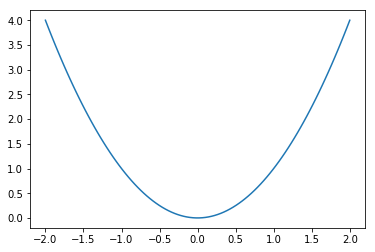

In [14]:
# Now matplotlib
# We can make very pretty, high quality plots with matplotlib.

# First make some x and y data
x = np.linspace(-2, 2, 100) #WHAT ARE THE ARGUMENTS???
y = x ** 2  # an example of a vectorized calculation. All values in x array are squared

plt.plot(x, y)  # matplotlib plot function (plt = matplotlib.pyplot)
plt.show()  # display the plot

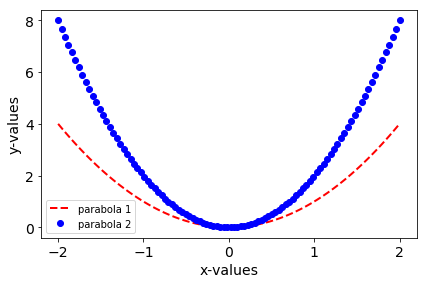

In [15]:
# There are many ways to spruce up the above plot. Here are some formatting parameters I 
# commonly use. 

plt.plot(x, y, '--', color='red', linewidth=2, label='parabola 1')
# You can also add more plots to the same plot 
plt.plot(x, 2*y, 'o', color='blue', linewidth=2, label='parabola 2')
plt.legend()
plt.xlabel('x-values', fontsize=14)
plt.ylabel('y-values', fontsize=14)
plt.tight_layout()  # tries to put borders around plot neatly so you don't have to crop later
plt.gcf().get_axes()[0].tick_params(labelsize=14)
plt.show()

In [16]:
# The above only serves as brief introduction to matplotlib's basic plotting capabilities. You
# can virtually make any kind of plot you want. You'll just need to read the documentation.

In [17]:
# Okay, now mdtraj
# I mainly use mdtraj in order to read gromacs trajectory files. There is a lot of other 
# functionality that I don't use because it's pretty specific to biomolecules.
# Gromacs trajectory files are either in .trr or .xtc format
# .trr files use full precision for everything while .xtc limits the precision, so the files
# are generally smaller. We don't usually need high precision.
# I've placed two files in this directory: PR.gro and PR.xtc
# We can load all of the information stored in PR.xtc and PR.gro with mdtraj

t = md.load("PR.xtc", top="PR.gro")  # when loading an .xtc or .trr, you must provide a .gro

print(t)

<mdtraj.Trajectory with 251 frames, 55200 atoms, 800 residues, and unitcells>


In [18]:
# Now we have a trajectory object, t, that contains all of the information about the trajectory
# that we need in order to conduct useful post-simulation analysis

# The positions of all atoms are stored in the "xyz" attribute
positions = t.xyz

# positions is a numpy array, so we can perform all of the operations available with numpy on
# the array

print(positions.shape) #WHAT EXACTLY DOES SHAPE DO/MEAN?

(251, 55200, 3)


In [19]:
# The shape of the position array is always [nframes, natoms, 3] where nframes is the number of
# frames in the trajectory, natoms is the number of atoms in system (entries are in the same
# order as they appear in the .gro files), and the last axis of shape 3 holds the x, y and z
# positions of each atom (in nanometers)

# A few other useful properties
time = t.time  # time in picoseconds
nframes = t.n_frames  # number of frames (no different than t.xyz.shape[0])
unitcell_vectors = t.unitcell_vectors  # unit cell vectors in tensor format [nframes, 3, 3]

print(time[-5:])  # display last five time points
print(nframes)
print(unitcell_vectors[-1, ...])  # Box vectors of last frame (... means to include all other data in that secion of array. This line is equivalent to t.unitcell_vectors[-1, :, :])

[393600. 395200. 396800. 398400. 400000.]
251
[[ 8.330404   0.         0.       ]
 [-4.1651955  7.2143455  0.       ]
 [ 0.         0.         8.961791 ]]


In [20]:
# A few more notes on the unitcell_vectors. The tensor describing the box vector for each frame
# is of shape [nframes, 3, 3]. Where nframes is number of frames. The entries are as follows:
# [[xx xy xz]
#  [yx yy yz]
#  [zx zy zz]
# So row one as the components of the x box vector in the x, y and z dimensions
# Imagine each row describing the direction and magnitude of a vector coming from the origin. 
# By convention, the x vector goes along the x-axis, so there is not y or z component.
# The y vector is 60 degrees to the x vector so it has an x and y component but no z #HOW AND WHAT AND WHY?
# The z vector is perpendicular to the plane formed by the x and y vectors so only has a z component
# The x and y vectors have the same length in this unit cell. Confirm that as follows:

xlength = np.linalg.norm(unitcell_vectors[-1, 0, :])  # this operation is same as sqrt(x^2 + y^2 +z^2)
ylength = np.linalg.norm(unitcell_vectors[-1, 1, :])
print(xlength, ylength)

8.330404 8.330404


In [21]:
# Let's find the average x box vector length for the whole simulation
print(np.linalg.norm(unitcell_vectors[:, 0, :], axis=1).mean())

8.359889


In [22]:
# Let's break down exactly what happened in the previous block
# when we slice unitcell_vectors, the array becomes 2-dimensional
sliced_array = unitcell_vectors[:, 0, :]
print(sliced_array.shape)

(251, 3)


In [23]:
# This leaves the x box vector for each frame. 
# We want to calculate the length of the box vector at each frame which will yield 251 lengths
# We want to apply the norm to each row to achieve this. We can use the axis option instead of
# a for loop to do this calculation quickly.
norms = np.linalg.norm(sliced_array, axis=1)
print(norms.shape)

(251,)


In [24]:
# Any easy way to figure out what to choose for the axis option is to think about which axis
# you want to eliminate. If the shape is (251, 3) and we expect an output array of length 251,
# then we want to eliminate axis 1 (recall numbering starts from 0, so axis 0 has size 251
# and axis 1 has size 3)

# The output is a numpy array, so we can do numpy operations
print(norms.mean())  # or equivalently, np.mean(norms)

8.359889


In [25]:
# Let's work more with the trajectory now
# Let's get the names of every atom in the order that they appear in the .gro file
# First, let's look at the topology generator #WHERE DID THE TOPOLOGY GENERATOR COME FROM?

print(t.topology)

<mdtraj.Topology with 1 chains, 800 residues, 55200 atoms, 0 bonds>


In [26]:
# t.topology contains a number of attributes which you can iterate through. However, you 
# can't just print the attributes. For example...
print(t.topology.atoms)  # t.topology.atoms is a way to get information about atoms

<generator object atoms at 0x7ff9d04612b0>


In [27]:
# t.topology.atoms is just a generator. It doesn't have all the atoms stored in an array. Rather,
# it produces information on the fly. To store all of the names, we need to iterate:
names = []
for a in t.topology.atoms:
    names.append(a.name)
    
print(names[:10]) # display the first 10 names

['C', 'C1', 'C2', 'C3', 'C4', 'C5', 'O', 'O1', 'O2', 'C6']


In [28]:
# It's not much different from the builtin range function
print(range(10))

range(0, 10)


In [29]:
# You have to loop through to access everything
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [30]:
# We can get the names of all atoms using a single line using a list comprehension
# List comprehensions are generally used to generated a list of values using a for loop
# Let's say we want to create a list of numbers from 0 to 10
print([x for x in np.arange(11)])  # 11 because np.arange doesn't include stop value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [31]:
# essentially a list comprehension is a for loop written on one line in between brackets.
# Now let's get a list of all the atom names in this way

names = [a.name for a in t.topology.atoms]
print(names[:10])

['C', 'C1', 'C2', 'C3', 'C4', 'C5', 'O', 'O1', 'O2', 'C6']


In [32]:
# There are a lot of atom properties you can iterate through in t.topology.atoms
# Some that I use commonly: t.topology.atoms.name, t.topology.atoms.index, t.topology.residue

# Let's do something more complicated. I want to calculate the average z-position of all 'O1' atoms
# located in the first pore frame-by-frame and then plot the results. I'll show how to do it in a few 
# steps

In [33]:
# (1) Get indices of all "O1" atoms.
keep = [a.index for a in t.topology.atoms if a.name == "O1"]  # you can add conditionals to list comprehensions
print(len(keep))  # There should be 400 O1 atoms since each monomer contains 1

400


In [34]:
# (2) Restrict to first pore. This takes knowledge of how build.py works. Each system is built 1
# pore at a time. There are 400 monomers and 4 pores. So the first 100 monomers are placed in
# the first pore. Likewise, that means that the first 100 O1 atoms in the first pore.
keep = keep[:100]  # restricted to first pore #WOULD keep[1:1000] also work?

In [35]:
# (2) Get positions of "O1" atoms by slicing position array
O1_positions = t.xyz[:, keep, 2]  # [keep all frames, keep only indices of O1 atoms in first pore, keep z coordinates]
print(O1_positions.shape)  # O1_positions contains xyz positions of all O1 atoms in first pore in each of 251 frames

(251, 100)


In [36]:
# (3) Get average positions.
average_position = O1_positions.mean(axis=1)  # want to average z-position at each frame
print(average_position.shape)

(251,)


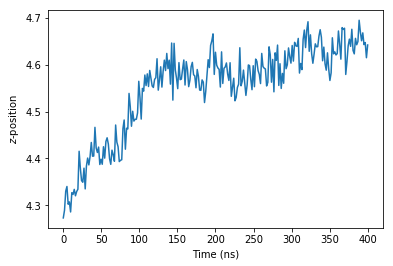

In [37]:
# (4) Plot (without any fancy formatting)
plt.plot(time / 1000, average_position)
plt.xlabel('Time (ns)')
plt.ylabel('$z$-position')  # Using $ makes matplotlib interpret as done by Latex math mode
plt.show()

In [38]:
# This isn't a super interesting statistic, but hopefully you can see how the mdtraj trajectory
# object makes it easy to do relatively complicated calculations in a pretty straightforward way.

In [39]:
# Okay let's use some of my scripts.
# First let's calculate pore-to-pore distance. This can be done with p2p.py. 
# This is one of my earlier scripts that will be revised eventually. It is poorly written and
# poorly organized. So one day this section will need to be re-written

from LLC_Membranes.analysis import p2p  # import the script

# all of the following is written in p2p.py after "if __name__ == '__main__'". This line of code
# is necessary so that the module can be imported elsewhere without running a bunch of code.
pos = p2p.restrict_atoms(t, 'NA')  # we will locate the pore center using the average position
# of sodium ions in each pore. This is specific to my system. Which atoms to use to find the pore
# center is something that requires a small amount of thought

In [40]:
# get the pore centers
npores = 4
p_centers = p2p.avg_pore_loc(npores, pos)
print(p_centers.shape)

(2, 4, 251)


In [41]:
# The shape of the array is not ideal, but it holds the average x and y coordinates of the 
# sodium ions in each of the pores at each of the 251 frames.
# Calculate pore-to-pore distances
distances = 6  # number of pore to pore distances to calculate. There are 6 unique distances in a parallelogram
p2ps = p2p.p2p(p_centers, distances)
print(p2ps.shape)

(6, 251)


In [42]:
means = np.zeros(distances)
for i in range(distances):
    means[i] = np.mean(p2ps[i, :])
print(means)

[4.08589915 4.08937664 4.22971068 7.25881061 4.33380885 4.31345498]


In [43]:
# In a perfect parallelogram with equal length sides, there are 5 distances between the corner 
# points that are exactly the same distance, d, apart. The sixth distance is sqrt(3)*d. We 
# eliminate the outlier from the calculation.
exclude = [np.argmax(means)]  # written as a list because following function needs it as a list (remember I said this is poorly written)
nboot = 200  # we will generate statistics via bootstrapping (more on that another time)
p2p_avg, p2p_std, equil = p2p.p2p_stats(p2ps, exclude, nboot, 'auto')  # the last parameter refers the determination of equilibration. 'auto' means it'll detect it automatically usign a method implemented in pymbar. If you don't want that, set the index of equilibration manually with an integer value.
print('Equilibration detected after %d ns' % (t.time[equil] / 1000))
print('Average Pore to Pore distance: %.3f' % p2p_avg)
print('Standard Deviation of Pore to Pore distances: %.3f' % p2p_std)

Maximum Autocorrelation Time: 2.8862687662345197 frames
20 Independent Trajectories
Equilibration detected after 304 ns
Average Pore to Pore distance: 4.186
Standard Deviation of Pore to Pore distances: 0.133


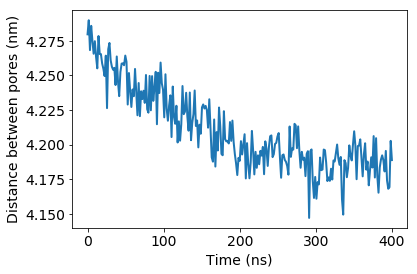

In [44]:
# Now let's plot average pore-to-pore distance vs. time
plt.figure()
plt.xlabel('Time (ns)', fontsize=14)
plt.ylabel('Distance between pores (nm)', fontsize=14)
plt.gcf().get_axes()[0].tick_params(labelsize=14)

display = [i for i in range(distances) if i not in exclude]  # don't want to include excluded trajectory
plt.plot(time / 1000, p2ps[display, :].mean(axis=0), linewidth=2)
plt.show()

In [ ]:
# Cool, we did it. That's an example of how to use the functionality of p2p.py in your own
# python script. 
# BUT the easiest way to use these scripts is from the command line.
# For example type the following in the directory where this notebook is stored:
# p2p.py -t PR.xtc -g PR.gro -c NA -b 200 --plot_avg --auto_exclude
# This will produce the same results which we arrived at above.
# There are more flags you can pass to p2p.py to affect the output. View them with:
# p2p.py -h
# Also, every script has an initialize() function near the top which has all of the arguments

In [ ]:
# More on the LLC_Membranes repository
# The current structure of the LLC_Membranes repo attempts to be organized somewhat intuitively
# This repo will never be distrbuted as a python package. I am working on a separate repository
# called 'llcsim' which contains only the necessary parts of this directory. 

# The most important directories are:
# setup -- contains all python scripts used to set up system (generate initial config, topologies, mdps etc.)
# analysis -- scripts which conduct all post simulation analysis
# top -- Contains monomer / solute structures + topologies as well as gaff force field
# llclib -- Contains a library of commonly used functions. Usually imported to setup or analysis scripts

In [ ]:
# More on llclib. 
# The llclib repository contains a relatively small amount of python files. Each contains a 
# number of functions which can be imported for use in other scripts. The main ones are as 
# follows:
# file_rw.py -- operations having to do with reading and writing files
# fitting_functions.py -- functions you might want to fit to data
# physical.py -- common physical property calcluations
# stats.py -- contains statistical functions
# timeseries.py -- Functions involving time series (autocorrelation, mean squared displacement etc.)
# topology.py -- Create objects out of residues, solutes etc. for easy extraction of properties
# transform.py -- Euclidean space transformations (rotation, translation etc.)

In [ ]:
# More on topology.py
# This script is useful because it exhaustively characterizes liquid crystal monomers and solutes
# The function to read the annotations in the .gro file stored in top/topologies is here

from LLC_Membranes.llclib import topology
lc = topology.LC('NAcarb11V.gro')  # this is a line in build.py for example

print(lc.natoms)
print(lc.planeatoms)
print(lc.plane_indices)
print(lc.lineatoms)
print(lc.residues)
print(lc.nresidues)
print(lc.benzene_carbons)